# EDA

## Plan:

- Hist plots and correlation for continous variables
- Value counts for catagorical variables
- Groupby on catagorical variables?
- Pivot tables to see correlations with Evergreen or not

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df=pd.read_csv("data_cleaned.csv")

In [10]:
pd.set_option("display.max_columns", None)
df.head()

,Unnamed: 0,url,alchemy_category,alchemy_category_score,avglinksize,compression_ratio,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,url_simp,commonlinkratio
0,0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,business,0.789131,2.055556,0.443783,0.090774,0,0.245831,0.003883,1,1,24,0,5424,170,8,0.152941,0.079130,0,bloomberg,0.238235
1,1,http://www.popsci.com/technology/article/2012-...,recreation,0.574147,3.677966,0.468649,0.098707,0,0.203490,0.088652,1,1,40,0,4973,187,9,0.181818,0.125448,1,popsci,0.288770
2,2,http://www.menshealth.com/health/flu-fighting-...,health,0.996526,2.382883,0.525448,0.072448,0,0.226402,0.120536,1,1,55,0,2240,258,11,0.166667,0.057613,1,menshealth,0.261628
3,3,http://www.dumblittleman.com/2007/12/10-foolpr...,health,0.801248,1.543103,0.480725,0.095861,0,0.265656,0.035343,1,0,24,0,2737,120,5,0.041667,0.100858,1,dumblittleman,0.129167
4,4,http://bleacherreport.com/articles/1205138-the...,sports,0.719157,2.676471,0.446143,0.024908,0,0.228887,0.050473,1,1,14,0,12032,162,10,0.098765,0.082569,0,bleacherreport,0.222222


In [11]:
df.columns

Index(['Unnamed: 0', 'url', 'alchemy_category', 'alchemy_category_score',
       'avglinksize', 'compression_ratio', 'frameTagRatio', 'hasDomainLink',
       'html_ratio', 'image_ratio', 'is_news', 'lengthyLinkDomain',
       'linkwordscore', 'news_front_page', 'non_markup_alphanum_characters',
       'numberOfLinks', 'numwords_in_url', 'parametrizedLinkRatio',
       'spelling_errors_ratio', 'label', 'url_simp', 'commonlinkratio'],
      dtype='object')

In [12]:
df_cat=df[['alchemy_category','hasDomainLink','is_news','lengthyLinkDomain','news_front_page','url_simp','label']]

df_cont=df[[ 'alchemy_category_score',
       'avglinksize', 'compression_ratio', 'frameTagRatio','html_ratio', 'image_ratio','linkwordscore','non_markup_alphanum_characters',
       'numberOfLinks', 'numwords_in_url', 'parametrizedLinkRatio',
       'spelling_errors_ratio','commonlinkratio']]

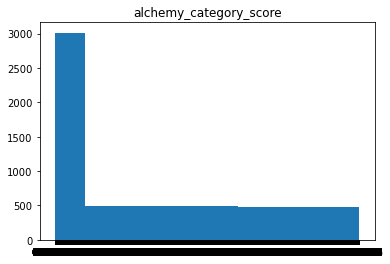

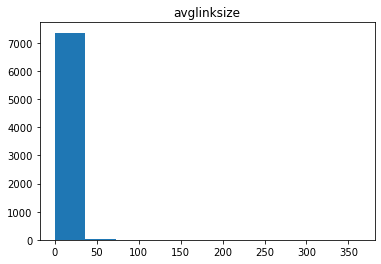

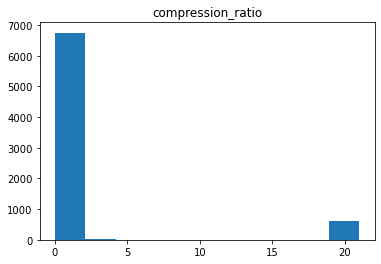

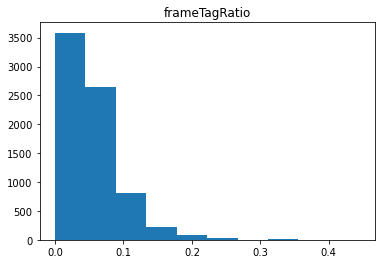

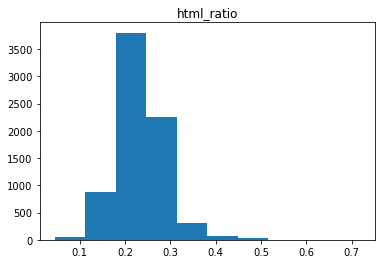

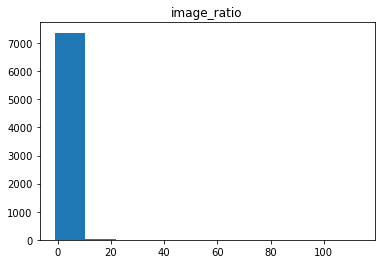

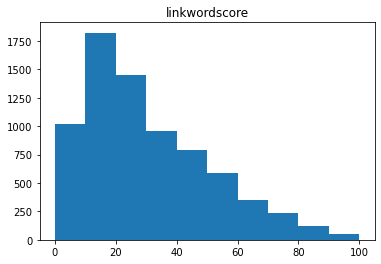

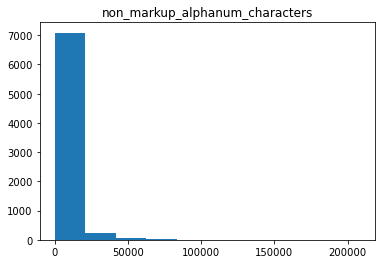

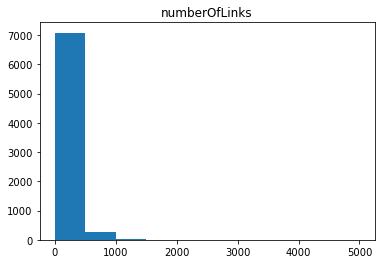

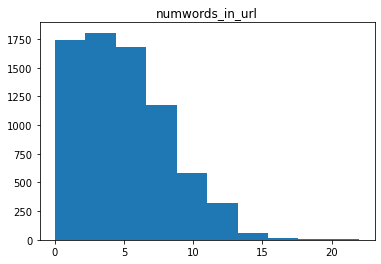

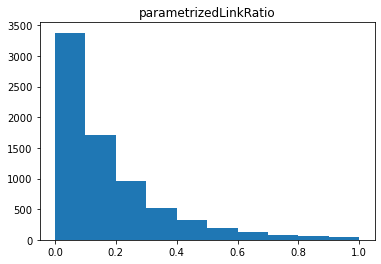

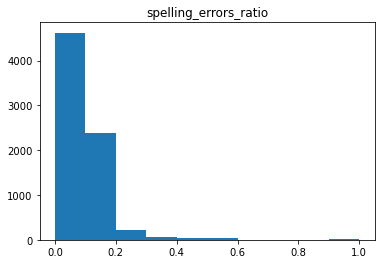

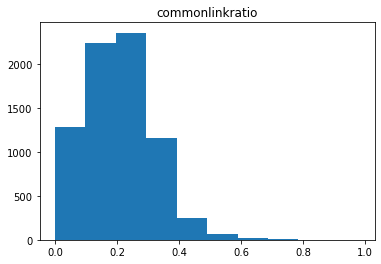

In [13]:
for i in df_cont.columns:
    plt.hist(df_cont[i])
    plt.title(i)
    plt.show()

Perhaps we should take the non-normal distributions and normalize them

In [14]:
corr=df_cont.corr()
corr

,avglinksize,compression_ratio,frameTagRatio,html_ratio,image_ratio,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,commonlinkratio
avglinksize,1.000000,-0.003578,-0.049270,0.018974,-0.003002,0.122550,-0.010982,0.000360,-0.033890,0.006089,0.035393,0.165527
compression_ratio,-0.003578,1.000000,0.159335,0.106335,-0.188976,0.146470,-0.064163,-0.055388,-0.042614,-0.033772,0.364122,-0.025319
frameTagRatio,-0.049270,0.159335,1.000000,0.384937,-0.088847,0.158874,-0.303682,-0.362491,0.049330,-0.094557,0.033663,-0.292022
html_ratio,0.018974,0.106335,0.384937,1.000000,-0.172924,-0.141363,-0.136550,-0.455636,-0.042001,-0.183350,0.013860,-0.192886
image_ratio,-0.003002,-0.188976,-0.088847,-0.172924,1.000000,0.051436,-0.026655,0.091977,-0.037265,0.118549,-0.010975,-0.060337
linkwordscore,0.122550,0.146470,0.158874,-0.141363,0.051436,1.000000,-0.379487,0.171880,-0.011236,-0.000052,0.025707,0.232281
non_markup_alphanum_characters,-0.010982,-0.064163,-0.303682,-0.136550,-0.026655,-0.379487,1.000000,0.375584,0.076632,0.012631,-0.010207,0.227359
numberOfLinks,0.000360,-0.055388,-0.362491,-0.455636,0.091977,0.171880,0.375584,1.000000,0.068791,0.136482,0.001343,0.341982
numwords_in_url,-0.033890,-0.042614,0.049330,-0.042001,-0.037265,-0.011236,0.076632,0.068791,1.000000,-0.095363,-0.107631,0.111160
parametrizedLinkRatio,0.006089,-0.033772,-0.094557,-0.183350,0.118549,-0.000052,0.012631,0.136482,-0.095363,1.000000,-0.007397,-0.056926


<AxesSubplot:>

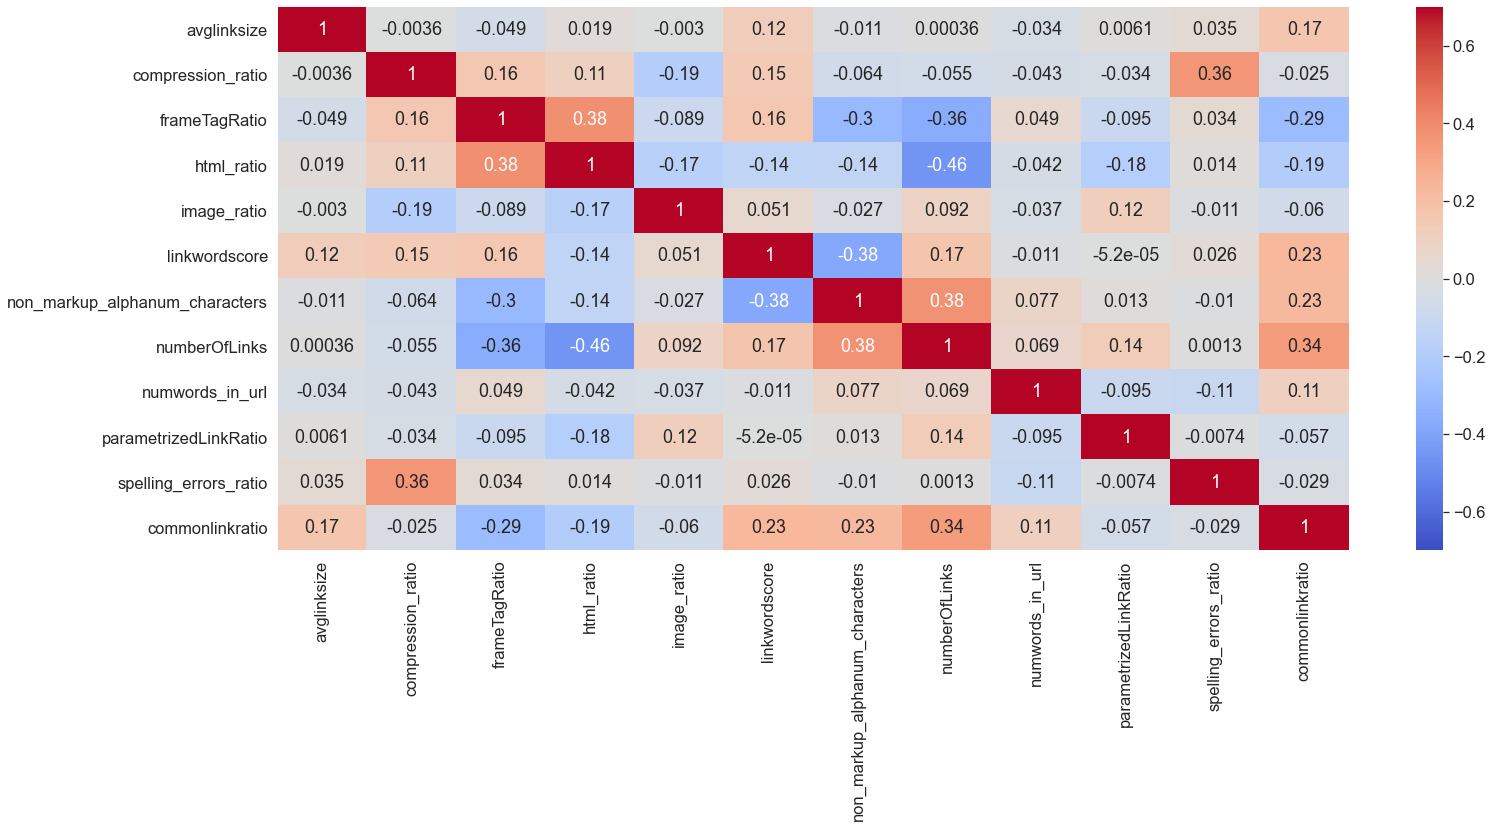

In [15]:
plt.figure(figsize=(24,10))
sns.set(font_scale=1.5)
sns.heatmap(corr, xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap='coolwarm',
           vmin=-0.7,
            vmax=0.7,
            center=0,
           annot = True)

In [16]:
# Creating pivot table to find correlation between continuous variables and label(Evergreen or not)

In [17]:
training=df[[ 'alchemy_category_score',
       'avglinksize', 'compression_ratio', 'frameTagRatio','html_ratio', 'image_ratio','linkwordscore','non_markup_alphanum_characters',
       'numberOfLinks', 'numwords_in_url', 'parametrizedLinkRatio',
       'spelling_errors_ratio','commonlinkratio','label']]

In [18]:
# Comparing EverGreen or not by differnet continuous variables
pd.pivot_table(training,index="label",values=['alchemy_category_score',
       'avglinksize', 'compression_ratio', 'frameTagRatio','html_ratio', 'image_ratio','linkwordscore','non_markup_alphanum_characters',
       'numberOfLinks', 'numwords_in_url', 'parametrizedLinkRatio',
       'spelling_errors_ratio','commonlinkratio'])

,avglinksize,commonlinkratio,compression_ratio,frameTagRatio,html_ratio,image_ratio,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
label,,,,,,,,,,,,
0,2.707187,0.194305,2.605038,0.064414,0.236535,0.309741,33.716866,4827.207836,163.976104,5.043068,0.170856,0.105987
1,2.813624,0.216911,1.923330,0.048846,0.231164,0.243443,26.626185,6559.832192,192.766070,4.882508,0.174768,0.096702


I don't see a particularly large correlation between any variables and the label of if the website is Evergreen or not. However, the few that stand out are:
- Compression ratio(higher in non-evergreen)
- Image_ratio(higher in non-evergreen)
- linkwordscore(higher in non-evergreen)
- non_markup_alphanum_characters(higher in evergreen)
- number of links(higher in evergreen)

## Value Count charts for Catagorical Variables

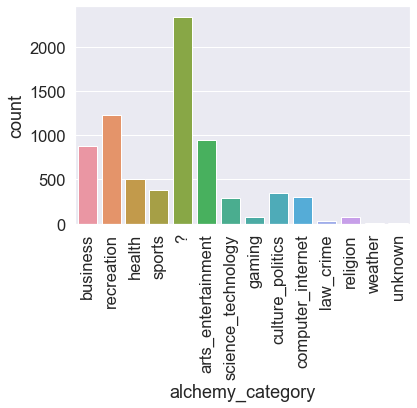

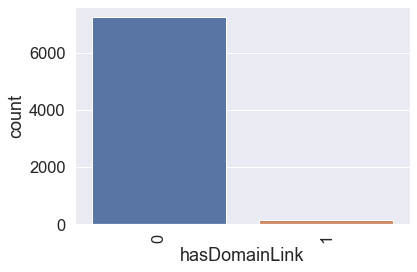

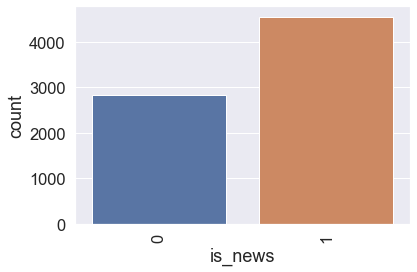

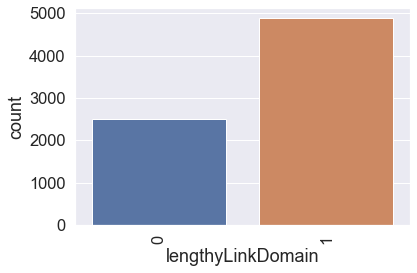

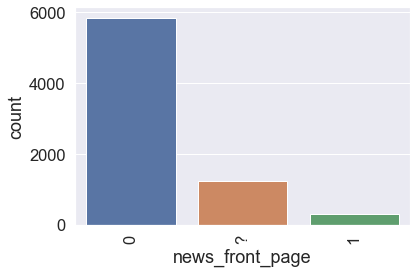

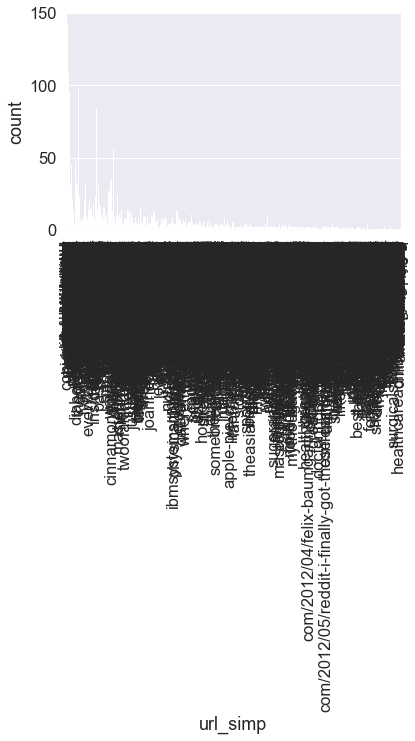

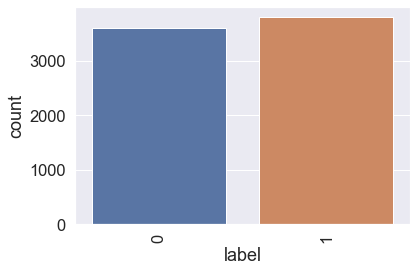

In [19]:
for i in df_cat.columns:
    sns.countplot(data=df_cat,x=i)
    plt.xticks(rotation=90)
    plt.show()

In [20]:
# Let's replace the "?" values in the alchemy category with "other" and also drop categories labeled as unknown. 

df["alchemy_category"]=df["alchemy_category"].apply(lambda x:x.replace("?","other"))
df=df[df["alchemy_category"]!="unknown"]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7389 entries, 0 to 7394
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      7389 non-null   int64  
 1   url                             7389 non-null   object 
 2   alchemy_category                7389 non-null   object 
 3   alchemy_category_score          7389 non-null   object 
 4   avglinksize                     7389 non-null   float64
 5   compression_ratio               7389 non-null   float64
 6   frameTagRatio                   7389 non-null   float64
 7   hasDomainLink                   7389 non-null   int64  
 8   html_ratio                      7389 non-null   float64
 9   image_ratio                     7389 non-null   float64
 10  is_news                         7389 non-null   int64  
 11  lengthyLinkDomain               7389 non-null   int64  
 12  linkwordscore                   73

In [22]:
# Let's also replace the "?" in news_front_page to 0 because that is the mode. 
df["news_front_page"]=df["news_front_page"].apply(lambda x:x.replace("?","0"))

In [23]:
# Let's re-run the df_cat and df_cont and training dataframes to update it with the changes we have made

df_cat=df[['alchemy_category','hasDomainLink','is_news','lengthyLinkDomain','news_front_page','url_simp','label']]

df_cont=df[[ 'alchemy_category_score',
       'avglinksize', 'compression_ratio', 'frameTagRatio','html_ratio', 'image_ratio','linkwordscore','non_markup_alphanum_characters',
       'numberOfLinks', 'numwords_in_url', 'parametrizedLinkRatio',
       'spelling_errors_ratio','commonlinkratio']]
training=df[[ 'alchemy_category_score',
       'avglinksize', 'compression_ratio', 'frameTagRatio','html_ratio', 'image_ratio','linkwordscore','non_markup_alphanum_characters',
       'numberOfLinks', 'numwords_in_url', 'parametrizedLinkRatio',
       'spelling_errors_ratio','commonlinkratio','label']]

In [24]:
# Let's look more specifically at the catagorical columns and their relationship with whether the website is evergreen
# or not. 
# Let's do this by grouping by the column and taking the mean of the label. 

In [25]:
df.groupby("alchemy_category").mean()["label"]

alchemy_category
arts_entertainment    0.371945
business              0.711364
computer_internet     0.246622
culture_politics      0.457726
gaming                0.368421
health                0.573123
law_crime             0.419355
other                 0.502135
recreation            0.684296
religion              0.416667
science_technology    0.456747
sports                0.205263
weather               0.000000
Name: label, dtype: float64

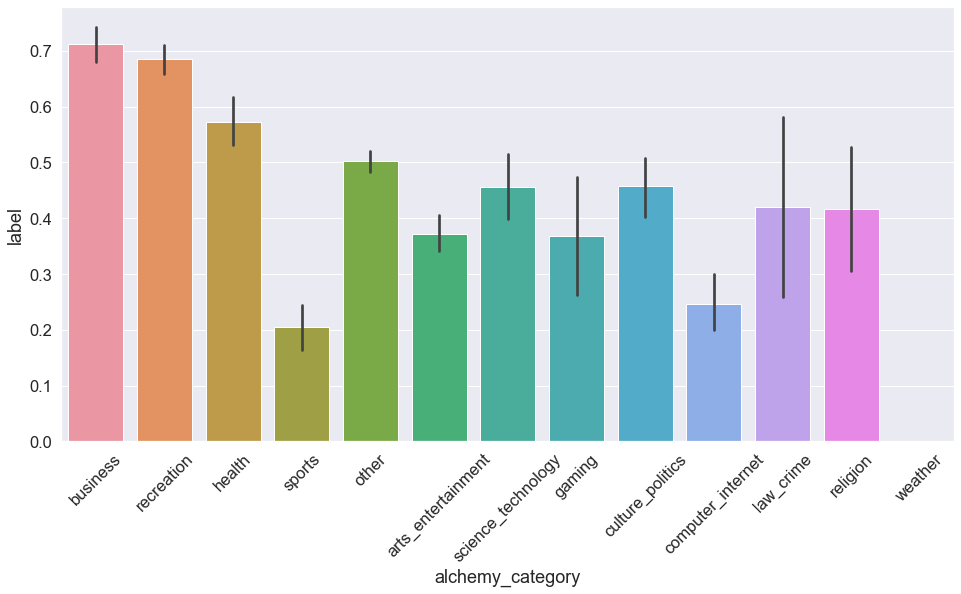

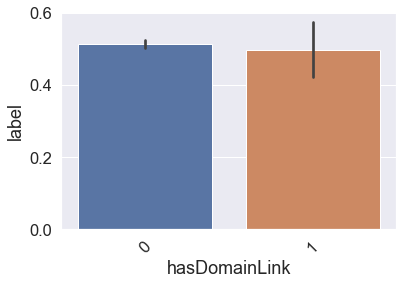

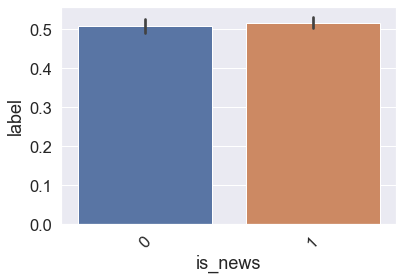

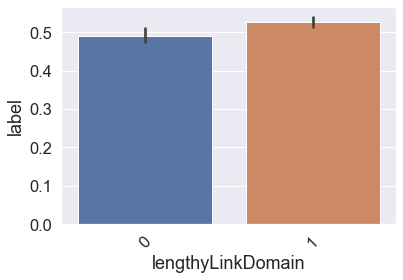

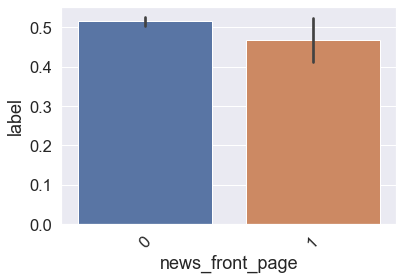

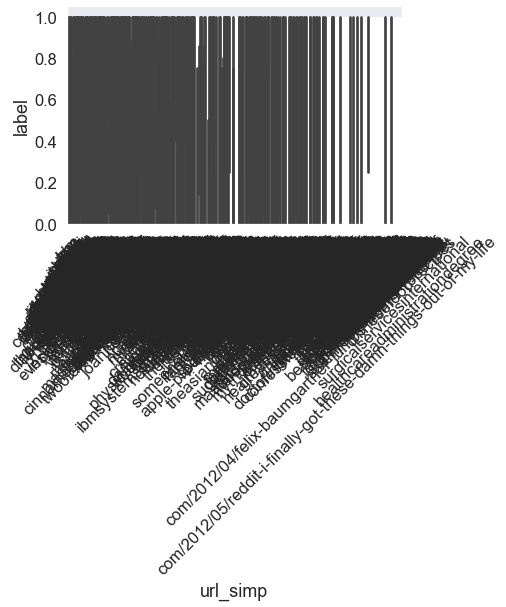

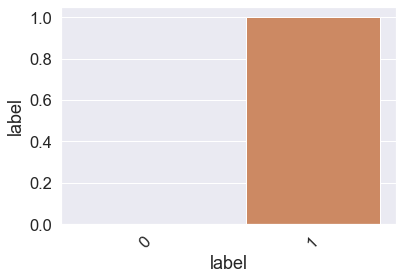

In [26]:
# Creating barplots showing correlation between catagorical variables and label
plt.figure(figsize=(16,8))
for i in df_cat.columns:
    sns.barplot(data=df_cat,x=i,y="label")
    plt.xticks(rotation=45) 
    plt.show()


## Feature Engineering

In [27]:
df.columns

Index(['Unnamed: 0', 'url', 'alchemy_category', 'alchemy_category_score',
       'avglinksize', 'compression_ratio', 'frameTagRatio', 'hasDomainLink',
       'html_ratio', 'image_ratio', 'is_news', 'lengthyLinkDomain',
       'linkwordscore', 'news_front_page', 'non_markup_alphanum_characters',
       'numberOfLinks', 'numwords_in_url', 'parametrizedLinkRatio',
       'spelling_errors_ratio', 'label', 'url_simp', 'commonlinkratio'],
      dtype='object')

In [28]:
# First let's change the null values to "?" and remove all nulls

df=df.replace('?',np.NaN)
# Let's also change the "others" value i set in alchemy category to null 

df["alchemy_category"]=df["alchemy_category"].replace('other',np.NaN)

In [29]:
df.isna().sum()

# Let's drop all na values

df.dropna(axis=1,inplace=True)

In [30]:
df.isnull().sum()

Unnamed: 0                        0
url                               0
avglinksize                       0
compression_ratio                 0
frameTagRatio                     0
hasDomainLink                     0
html_ratio                        0
image_ratio                       0
is_news                           0
lengthyLinkDomain                 0
linkwordscore                     0
news_front_page                   0
non_markup_alphanum_characters    0
numberOfLinks                     0
numwords_in_url                   0
parametrizedLinkRatio             0
spelling_errors_ratio             0
label                             0
url_simp                          0
commonlinkratio                   0
dtype: int64

In [31]:
# Let's simplify the url_simp category as there are too many different categories.

df["url_simp"].value_counts().head(30)

insidershealth       143
sportsillustrated    109
huffingtonpost        99
allrecipes            96
bleacherreport        86
blogs                 85
youtube               85
ivillage              58
foodnetwork           57
blog                  48
dailymail             46
epicurious            36
womansday             35
bbc                   34
popsci                33
marthastewart         33
guardian              33
itechfuture           33
collegehumor          32
buzzfeed              31
news                  31
telegraph             28
wimp                  28
npr                   27
gizmodo               27
menshealth            27
seriouseats           25
instructables         24
smittenkitchen        24
thepioneerwoman       23
Name: url_simp, dtype: int64

In [32]:
df["url_simp"].nunique()

3204

In [33]:
# To make the model count we have to change the column to the amount of times the url was entered.
# Let's create categories based on the count of each url 

In [34]:
df_groupby=df.groupby("url_simp").count()

In [35]:
df_groupby.reset_index(inplace=True)

In [36]:
df_groupby.head()

,url_simp,Unnamed: 0,url,avglinksize,compression_ratio,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,commonlinkratio
0,0db,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1000awesomethings,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1001recipe,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,100milediet,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,101cookbooks,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12


In [37]:
#df["count_url"]=df_groupby["url_simp"].apply(lambda x:counturl(x))

In [38]:
df.head()

,Unnamed: 0,url,avglinksize,compression_ratio,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,url_simp,commonlinkratio
0,0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,2.055556,0.443783,0.090774,0,0.245831,0.003883,1,1,24,0,5424,170,8,0.152941,0.079130,0,bloomberg,0.238235
1,1,http://www.popsci.com/technology/article/2012-...,3.677966,0.468649,0.098707,0,0.203490,0.088652,1,1,40,0,4973,187,9,0.181818,0.125448,1,popsci,0.288770
2,2,http://www.menshealth.com/health/flu-fighting-...,2.382883,0.525448,0.072448,0,0.226402,0.120536,1,1,55,0,2240,258,11,0.166667,0.057613,1,menshealth,0.261628
3,3,http://www.dumblittleman.com/2007/12/10-foolpr...,1.543103,0.480725,0.095861,0,0.265656,0.035343,1,0,24,0,2737,120,5,0.041667,0.100858,1,dumblittleman,0.129167
4,4,http://bleacherreport.com/articles/1205138-the...,2.676471,0.446143,0.024908,0,0.228887,0.050473,1,1,14,0,12032,162,10,0.098765,0.082569,0,bleacherreport,0.222222


# Make a url category column

In [39]:
# 1. Make a dictionary: {url:count}
url_count_df = pd.DataFrame(df['url_simp'].value_counts()).reset_index()
url_count_dict = {}
for i in range(url_count_df.shape[0]):
    url_count_dict[url_count_df['index'][i]] = url_count_df['url_simp'][i]
url_count_dict

{'insidershealth': 143,
 'sportsillustrated': 109,
 'huffingtonpost': 99,
 'allrecipes': 96,
 'bleacherreport': 86,
 'blogs': 85,
 'youtube': 85,
 'ivillage': 58,
 'foodnetwork': 57,
 'blog': 48,
 'dailymail': 46,
 'epicurious': 36,
 'womansday': 35,
 'bbc': 34,
 'popsci': 33,
 'marthastewart': 33,
 'guardian': 33,
 'itechfuture': 33,
 'collegehumor': 32,
 'buzzfeed': 31,
 'news': 31,
 'telegraph': 28,
 'wimp': 28,
 'npr': 27,
 'gizmodo': 27,
 'menshealth': 27,
 'seriouseats': 25,
 'instructables': 24,
 'smittenkitchen': 24,
 'thepioneerwoman': 23,
 'cbsnews': 21,
 'geek': 21,
 'foxnews': 21,
 'flickr': 20,
 'refinery29': 20,
 'break': 19,
 'realsimple': 18,
 'villagevoice': 18,
 'wired': 17,
 'laweekly': 17,
 'cracked': 16,
 'mnn': 16,
 'recipes': 16,
 'theatlantic': 15,
 'sports': 15,
 'thekitchn': 15,
 'ehow': 15,
 'howsweeteats': 15,
 'treehugger': 15,
 'antiaging-systems': 14,
 'twopeasandtheirpod': 14,
 'collegefashion': 14,
 'polyvore': 14,
 'techcrunch': 13,
 'washingtonpost': 

In [40]:
# 2. make a col for url_count in df
url_count = []
for i in range(df.shape[0]):
    url = df['url_simp'].iloc[i]
    count = url_count_dict[url]
    url_count.append(count)

df['url_count'] = url_count
df.head()

,Unnamed: 0,url,avglinksize,compression_ratio,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,url_simp,commonlinkratio,url_count
0,0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,2.055556,0.443783,0.090774,0,0.245831,0.003883,1,1,24,0,5424,170,8,0.152941,0.079130,0,bloomberg,0.238235,1
1,1,http://www.popsci.com/technology/article/2012-...,3.677966,0.468649,0.098707,0,0.203490,0.088652,1,1,40,0,4973,187,9,0.181818,0.125448,1,popsci,0.288770,33
2,2,http://www.menshealth.com/health/flu-fighting-...,2.382883,0.525448,0.072448,0,0.226402,0.120536,1,1,55,0,2240,258,11,0.166667,0.057613,1,menshealth,0.261628,27
3,3,http://www.dumblittleman.com/2007/12/10-foolpr...,1.543103,0.480725,0.095861,0,0.265656,0.035343,1,0,24,0,2737,120,5,0.041667,0.100858,1,dumblittleman,0.129167,4
4,4,http://bleacherreport.com/articles/1205138-the...,2.676471,0.446143,0.024908,0,0.228887,0.050473,1,1,14,0,12032,162,10,0.098765,0.082569,0,bleacherreport,0.222222,86


In [41]:
def categorize_url(url_count):
    if url_count>90:
        cat="A"
    elif url_count>50:
        cat="B"
    else:
        cat="C"
    return cat

In [42]:
df["url_cat"]=df["url_count"].apply(lambda x:categorize_url(x))
df.head(10)

,Unnamed: 0,url,avglinksize,compression_ratio,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,url_simp,commonlinkratio,url_count,url_cat
0,0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,2.055556,0.443783,0.090774,0,0.245831,0.003883,1,1,24,0,5424,170,8,0.152941,0.079130,0,bloomberg,0.238235,1,C
1,1,http://www.popsci.com/technology/article/2012-...,3.677966,0.468649,0.098707,0,0.203490,0.088652,1,1,40,0,4973,187,9,0.181818,0.125448,1,popsci,0.288770,33,C
2,2,http://www.menshealth.com/health/flu-fighting-...,2.382883,0.525448,0.072448,0,0.226402,0.120536,1,1,55,0,2240,258,11,0.166667,0.057613,1,menshealth,0.261628,27,C
3,3,http://www.dumblittleman.com/2007/12/10-foolpr...,1.543103,0.480725,0.095861,0,0.265656,0.035343,1,0,24,0,2737,120,5,0.041667,0.100858,1,dumblittleman,0.129167,4,C
4,4,http://bleacherreport.com/articles/1205138-the...,2.676471,0.446143,0.024908,0,0.228887,0.050473,1,1,14,0,12032,162,10,0.098765,0.082569,0,bleacherreport,0.222222,86,B
5,5,http://www.conveniencemedical.com/genital-herp...,119.000000,0.434639,0.019841,0,0.298300,0.038636,0,0,12,0,4368,55,3,0.054545,0.087356,0,conveniencemedical,0.409091,1,C
6,6,http://gofashionlane.blogspot.tw/2012/06/ameri...,0.773810,0.579596,0.039568,0,0.218978,0.311377,1,0,21,0,1287,93,3,0.548387,0.064327,1,gofashionlane,0.088710,1,C
7,7,http://www.insidershealth.com/article/racing_f...,1.883333,0.499348,0.026616,0,0.173746,0.025830,0,0,5,0,27656,132,4,0.068182,0.148551,0,insidershealth,0.278409,143,A
8,8,http://www.valetmag.com/the-handbook/features/...,0.471503,0.383199,0.021705,0,0.114962,1.136646,1,0,17,0,2471,194,7,0.644330,0.125000,1,valetmag,0.056701,1,C
9,9,http://www.howsweeteats.com/2010/03/24/cookies...,2.410112,0.465859,0.012000,0,0.205117,0.206262,0,1,14,0,11459,326,4,0.236196,0.094412,1,howsweeteats,0.148006,15,C


In [43]:
df.to_csv("EDA.csv")